In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pycaret

     |████████████████████████████████| 264 kB 11.3 MB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 248 kB 50.9 MB/s 
     |████████████████████████████████| 271 kB 53.4 MB/s 
     |████████████████████████████████| 6.8 MB 50.3 MB/s 
     |████████████████████████████████| 14.6 MB 120 kB/s 
     |████████████████████████████████| 111 kB 52.2 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 2.0 MB 43.2 MB/s 
     |████████████████████████████████| 167 kB 46.6 MB/s 
     |████████████████████████████████| 1.7 MB 41.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 9.5 MB/s 
     |████████████████████████████████| 102 kB 51.2 MB/s 
     |████████████████████████████████| 3.1 MB 38.7 MB/s 
     |█████████████████

In [3]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [4]:
train2=pd.read_csv('/content/gdrive/MyDrive/신용카드data/train.csv')
test2=pd.read_csv('/content/gdrive/MyDrive/신용카드data/test.csv')

In [5]:
del train2["index"]
train2.fillna('NAN', inplace=True) 
del test2["index"]
test2.fillna('NAN', inplace=True)

In [6]:
setup_clf = setup(data=train2,target="credit")

,Description,Value
0,session_id,2038
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
top5 = compare_models(sort="Accuracy",n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7010,0.7099,0.4313,0.7003,0.6267,0.2485,0.3295,0.701
rf,Random Forest Classifier,0.6983,0.7498,0.5388,0.6773,0.6824,0.3695,0.3755,2.544
gbc,Gradient Boosting Classifier,0.6935,0.6575,0.4116,0.6381,0.6087,0.2154,0.3061,7.610
ada,Ada Boost Classifier,0.6913,0.6293,0.4049,0.6511,0.6017,0.2002,0.3021,0.754
et,Extra Trees Classifier,0.6716,0.7111,0.5180,0.6510,0.6572,0.3193,0.3235,2.641
ridge,Ridge Classifier,0.6428,0.0000,0.3364,0.5394,0.5069,0.0091,0.0454,0.049
lda,Linear Discriminant Analysis,0.6426,0.6112,0.3387,0.5339,0.5116,0.0161,0.0550,0.228
nb,Naive Bayes,0.6421,0.6110,0.3345,0.5386,0.5034,0.0040,0.0324,0.052
lr,Logistic Regression,0.6414,0.5536,0.3333,0.4114,0.5013,0.0000,0.0000,0.667
knn,K Neighbors Classifier,0.6153,0.6569,0.4670,0.5965,0.6038,0.2176,0.2193,0.404


In [29]:
lightgbm = create_model("lightgbm",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6960,0.6982,0.4213,0.7013,0.6158,0.2272,0.3188
1,0.7052,0.7119,0.4358,0.7036,0.6312,0.2618,0.3473
2,0.6998,0.6954,0.4306,0.7173,0.6234,0.2396,0.3339
3,0.6922,0.6853,0.4162,0.6712,0.6109,0.2191,0.3062
4,0.6933,0.6834,0.4232,0.7138,0.6155,0.2246,0.3095
5,0.6928,0.6917,0.4157,0.6810,0.6103,0.2176,0.3093
6,0.6965,0.7101,0.4270,0.7050,0.6201,0.2377,0.3196
7,0.6987,0.7106,0.4271,0.6794,0.6224,0.2454,0.3255
8,0.6906,0.6758,0.4137,0.6677,0.6082,0.2134,0.3005
9,0.6872,0.7046,0.4137,0.6639,0.6070,0.2082,0.2879


In [27]:
rf = create_model("rf",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6949,0.7409,0.5270,0.6714,0.6753,0.3517,0.3607
1,0.6976,0.7409,0.5411,0.6771,0.6823,0.3702,0.3760
2,0.6965,0.7422,0.5377,0.6755,0.6790,0.3604,0.3681
3,0.7052,0.7565,0.5370,0.6820,0.6855,0.3754,0.3842
4,0.7014,0.7472,0.5400,0.6801,0.6834,0.3699,0.3779
5,0.7057,0.7563,0.5365,0.6822,0.6859,0.3763,0.3852
6,0.6944,0.7398,0.5387,0.6738,0.6794,0.3668,0.3716
7,0.6884,0.7373,0.5316,0.6673,0.6739,0.3561,0.3605
8,0.6825,0.7258,0.5176,0.6587,0.6633,0.3285,0.3360
9,0.6958,0.7414,0.5460,0.6766,0.6805,0.3643,0.3705


In [28]:
gbc = create_model("gbc",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6906,0.6572,0.4075,0.6790,0.6030,0.2037,0.3017
1,0.7003,0.6765,0.4211,0.7520,0.6177,0.2366,0.3350
2,0.6917,0.6399,0.4100,0.7074,0.6044,0.2032,0.3106
3,0.6895,0.6384,0.4060,0.6804,0.6008,0.1999,0.3000
4,0.6917,0.6358,0.4095,0.6812,0.6048,0.2086,0.3066
5,0.6901,0.6350,0.4067,0.6835,0.6016,0.2008,0.3023
6,0.6874,0.6662,0.4053,0.6630,0.6001,0.2019,0.2888
7,0.6987,0.6694,0.4212,0.7457,0.6173,0.2358,0.3275
8,0.6868,0.6319,0.4041,0.6736,0.5983,0.1943,0.2889
9,0.6818,0.6499,0.3953,0.6057,0.5893,0.1761,0.2700


In [ ]:
for

In [11]:
train=pd.read_csv('/content/gdrive/MyDrive/신용카드data/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/신용카드data/test.csv')
del train["index"]
train.fillna('NAN', inplace=True) 
del test["index"]
test.fillna('NAN', inplace=True)

In [14]:
setup_clf2= setup(train,target="credit",feature_selection=True)

,Description,Value
0,session_id,8180
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
lightgbm2 = create_model("lightgbm",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6960,0.6982,0.4213,0.7013,0.6158,0.2272,0.3188
1,0.7052,0.7119,0.4358,0.7036,0.6312,0.2618,0.3473
2,0.6998,0.6954,0.4306,0.7173,0.6234,0.2396,0.3339
3,0.6922,0.6853,0.4162,0.6712,0.6109,0.2191,0.3062
4,0.6933,0.6834,0.4232,0.7138,0.6155,0.2246,0.3095
5,0.6928,0.6917,0.4157,0.6810,0.6103,0.2176,0.3093
6,0.6965,0.7101,0.4270,0.7050,0.6201,0.2377,0.3196
7,0.6987,0.7106,0.4271,0.6794,0.6224,0.2454,0.3255
8,0.6906,0.6758,0.4137,0.6677,0.6082,0.2134,0.3005
9,0.6872,0.7046,0.4137,0.6639,0.6070,0.2082,0.2879


In [18]:
rf2 = create_model("rf",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6949,0.7409,0.5270,0.6714,0.6753,0.3517,0.3607
1,0.6976,0.7409,0.5411,0.6771,0.6823,0.3702,0.3760
2,0.6965,0.7422,0.5377,0.6755,0.6790,0.3604,0.3681
3,0.7052,0.7565,0.5370,0.6820,0.6855,0.3754,0.3842
4,0.7014,0.7472,0.5400,0.6801,0.6834,0.3699,0.3779
5,0.7057,0.7563,0.5365,0.6822,0.6859,0.3763,0.3852
6,0.6944,0.7398,0.5387,0.6738,0.6794,0.3668,0.3716
7,0.6884,0.7373,0.5316,0.6673,0.6739,0.3561,0.3605
8,0.6825,0.7258,0.5176,0.6587,0.6633,0.3285,0.3360
9,0.6958,0.7414,0.5460,0.6766,0.6805,0.3643,0.3705


In [19]:
gbc2 = create_model("gbc",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6906,0.6572,0.4075,0.6790,0.6030,0.2037,0.3017
1,0.7003,0.6765,0.4211,0.7520,0.6177,0.2366,0.3350
2,0.6917,0.6399,0.4100,0.7074,0.6044,0.2032,0.3106
3,0.6895,0.6384,0.4060,0.6804,0.6008,0.1999,0.3000
4,0.6917,0.6358,0.4095,0.6812,0.6048,0.2086,0.3066
5,0.6901,0.6350,0.4067,0.6835,0.6016,0.2008,0.3023
6,0.6874,0.6662,0.4053,0.6630,0.6001,0.2019,0.2888
7,0.6987,0.6694,0.4212,0.7457,0.6173,0.2358,0.3275
8,0.6868,0.6319,0.4041,0.6736,0.5983,0.1943,0.2889
9,0.6818,0.6499,0.3953,0.6057,0.5893,0.1761,0.2700


In [20]:
blender = blend_models(estimator_list = [lightgbm2,rf2,gbc2], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6992,0.7432,0.4301,0.6938,0.6244,0.2429,0.3283
1,0.7106,0.7477,0.4490,0.7043,0.6432,0.2858,0.3622
2,0.7079,0.7403,0.4469,0.7178,0.6397,0.2736,0.3557
3,0.7009,0.7494,0.4321,0.6814,0.6271,0.2526,0.3329
4,0.7036,0.7415,0.4406,0.7160,0.6335,0.2637,0.3406
5,0.7036,0.7485,0.4340,0.6865,0.6297,0.2570,0.3428
6,0.7057,0.7474,0.4441,0.7055,0.6372,0.2738,0.3470
7,0.7073,0.7468,0.4502,0.7130,0.6418,0.2804,0.3519
8,0.6901,0.7222,0.4227,0.6724,0.6151,0.2246,0.2977
9,0.6991,0.7471,0.4351,0.6968,0.6276,0.2492,0.3268


In [30]:
blender2=blend_models(estimator_list = [lightgbm,rf,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6992,0.7432,0.4301,0.6938,0.6244,0.2429,0.3283
1,0.7106,0.7477,0.4490,0.7043,0.6432,0.2858,0.3622
2,0.7079,0.7403,0.4469,0.7178,0.6397,0.2736,0.3557
3,0.7009,0.7494,0.4321,0.6814,0.6271,0.2526,0.3329
4,0.7036,0.7415,0.4406,0.7160,0.6335,0.2637,0.3406
5,0.7036,0.7485,0.4340,0.6865,0.6297,0.2570,0.3428
6,0.7057,0.7474,0.4441,0.7055,0.6372,0.2738,0.3470
7,0.7073,0.7468,0.4502,0.7130,0.6418,0.2804,0.3519
8,0.6901,0.7222,0.4227,0.6724,0.6151,0.2246,0.2977
9,0.6991,0.7471,0.4351,0.6968,0.6276,0.2492,0.3268


In [21]:
model = finalize_model(blender)

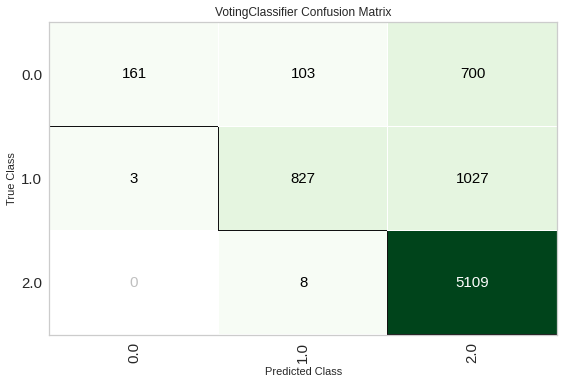

In [23]:
plot_model(model, plot = 'confusion_matrix')

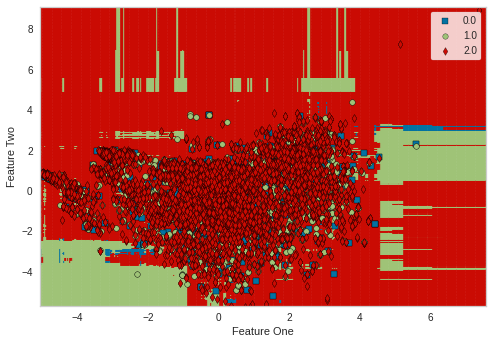

In [24]:
plot_model(model, plot = 'boundary')

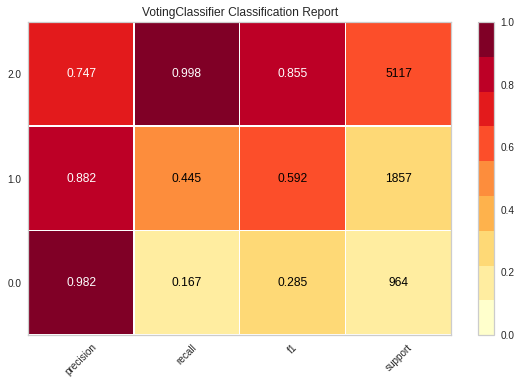

In [26]:
plot_model(model, plot = 'class_report')